![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Regressão

## 1. Considerações iniciais

Neste notebook vai praticar o desenvolvimento (pipeline) de uma solução utilizando Aprendizado de Máquina (Machine Learning). Mais espeficicamente, iremos criar um algoritmo de  **regressão** utilizando o conjunto de dados usando a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) do Python. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo por inteiro, ou o máximo dele.

De forma bem simples, as etapas são:
1. Obter nossos dados
2. Limpar e organizar nossos dados
3. Explorar e visualizar em busca de padrões ou tendências.
4. Aplicar um modelo
5. Interpretar os resultados

### 1.1. Por que usar o Scikit-Learn?
O ecossistema de bibiotecas do Python voltadas para aprendizado de máquina é vasto e bem consolidado. Uma das mais conhecidas é o [scikit-learn](https://scikit-learn.org/stable/index.html), que possui uma grande quantidade de algoritmos de aprendizado de máquina implementados - prontos para o uso. Simples e eficiente, o pacote do scikit-learn permite que o cientista rapidamente treine um modelo e interprete seus resultados.

Além de bem documentado, o scikit-learn também possui um comunidade de usuários bastante ativa, o que acaba refletindo em uma quantidade enorme de tutoriais, notebooks e exemplos pela web. A uniformidade da biblioteca (o processo de entrada e construção de modelos é semelhante) reflete em rapidez no desenvolvimento de soluções, visto que no momento que o usuário entende o fluxo de trabalho, ele rapidamente consegue "chavear" entre diversos modelos. Caso um modelo não esteja indo bem, basta usar outro.

### 1.2. Prepare seu ambiente
Se necessário, prossiga com a instalação da biblioteca do jeito Python. Sem esforço, use o gerenciador de pacotes da linguagem:
```
$ pip install scikit-learn
```

Lembre-se, ninguém brilha sozinho no Python. Pandas, numpy, matplotlib, searborn, etc são exemplos de bibliotecas de apoio. Na verdade, o bom cientista de dados trabalha com várias bibliotecas ao mesmo tempo.

### 1.3. Conjunto de dados
O conjunto de dados que utilizaremos contém informações sobre diferentes tipos de casas na cidade americana de Boston. Este conjunto de dados foi disponilizado no repositório de Aprendizado de Máquina da UCI. Aqui, o conjunto de dados está no arquivo [housing.csv](housing.csv).

Existem 506 amostras e 13 variáveis (colunas) neste conjunto de dados. O objetivo é prever o valor dos preços de casas usando estas variáveis.

#### 1.3.1. Descrição do dados

No conjunto de dados, encontraremos as seguintes variáveis:
- CRIM: Taxa de criminalidade per capita no bairro
- ZN: Proporção de terrenos residenciais com lotes com mais de 25.000 m2 no bairro
- INDUS: Proporção de acres comerciais não comerciais na cidade
- CHAS: Variável fictícia Charles River (1 se o terreno é limitado por rio; 0 caso contrário)
- NOX: Concentração de óxido nítrico (partes por 10 milhões) na cidade
- RM: Número médio de quartos por moradia no bairro
- AGE: Proporção de unidades ocupadas em propriedades construídas antes de 1940
- DIS: Distâncias ponderadas para cinco centros de emprego em Boston
- RAD: Índice de acessibilidade às rodovias
- TAX: Taxa de imposto sobre a propriedade de valor total (x10.000)
- PTRATIO: Proporcaoo de alunos por professor no bairro
- LSTAT: Porcentagem da população considerada classe baixa no bairro
- MEDV: Valor médio das casas ocupadas pelos proprietários (x1000)

A nossa variável alvo (que queremos prever) é a MEDV, ou seja, o valor médio das casas. Devemos encontrar um algoritmo que receba as 12 variáveis restantes e preveja o valor de MEDV. É o problema clássico de **regressão**.

## 2. Procedimentos

Comece importando as bibliotecas que você irá utilizar ao longo do caminho. Lembre-se que um cientista de dados trabalha com várias ferramentas.

#### __TAREFA 01__
1. Importe as bibliotecas que você utilizará

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


### 2.1. Obtendo os dados
Você não pode fazer nada sem dados. Aqui, o conjunto de dados já foi reunido e está em um arquivo CSV. Precisamos carregá-los para dentro do nosso código em um *dataframe* pandas.

#### __TAREFA 02__
1. Importe o pandas
2. Importe o arquivo CSV para dentro de um dataframe chamado *houses*.
3. Imprima o cabeçalho do dataframe.

In [8]:
df = pd.read_csv('houses.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Compare a informação do dataframe com o dicionário de dados apresentado no início deste notebook. Faz sentido? Existem variáveis faltantes?

Conhecer bem os dados e o problema em que vamos trabalhar é tão importante quanto saber o funcionamento de algoritmos. Esta tarefa também é conhecida como **Análise Exploratória de Dados (AED)**, onde o cientista faz uma investigação superficial sobre os dados.

Você irá perceber que esta investigação não é uma etapa fixa e inflexível dentro do fluxo de trabalho. Pelo contrário, AED acontece durante quase todo o processo. Estamos constantemente aprendendo sobre nossos dados.

#### __TAREFA 03__
1. Confirme que o dataframe possui 506 amostras e 13 variáveis

In [4]:
df.shape


(506, 13)

### 2.2. Limpar e organizar os dados

Dados corrompidos, falha ao carregar as informações ou extração incompleta podem gerar no mundo real valores faltantes (*missing*). Saber lidar com este tipo de situação é importante. Primeiro devemos verificar se o conjunto de dados possui valores missing.

#### __TAREFA 04__
1. Verifique se existem valores *missing* em alguma variável.

**DICA**: Esta tarefa pode ser realizada de várias formas. O importante é conseguir visualizar se existem valores *missing*.

In [5]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

E aí? Conseguiu encontrar valores *missing*? Note que não existe forma padrão de fazer esta busca.

Por que devemos procurá-los? 

R: Identificar e contornar esse problema (preencher ou remover) tende a gerar modelos de dados de Aprendizagem de Máquina confiáveis e robustos.

### 2.3. Explorar e visualizar em busca de padrões ou tendências.

Vamos continuar a AED, extraindo vários parâmetros estatísticos do conjunto de dados.

#### __TAREFA 05__
1. Gere estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Vamos verificar o relacionamento de algumas variáveis preditoras com a variável alvo (MEDV). Neste caso, vamos utilizar 'RM', 'LSTAT', 'PTRATIO'.

#### __TAREFA 06__
1. Plote a relação das variáveis 'RM', 'LSTAT', 'PTRATIO' com  a variável alvo.

**DICA**: Use a *sns.pairplot()*.

In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


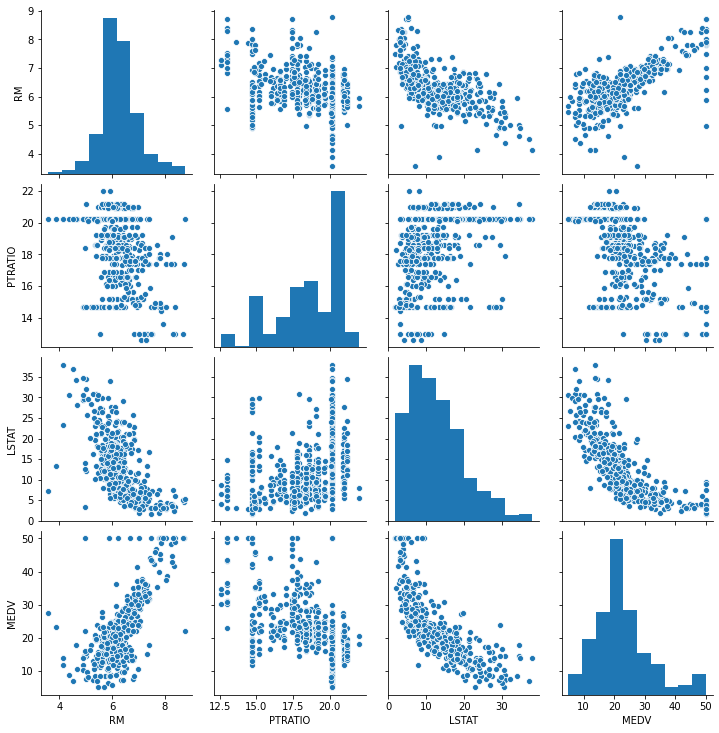

In [31]:
df2 = df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX'], axis=1)
sns.pairplot(df2)
df2.head()


Conseguiu enxergar relação entre alguma das variáveis?

Veja a variável 'RM' e 'MEDV'. Ao que tudo indica, existe uma relação positiva entre a quantidade de quartos e o valor das casas. Quanto mais casas, maior é o valor da casa.

Agora a variável 'LSTAT' e 'MEDV' parece que ocorre o inverso. Quanto maior a quantidade de pessoas consideradas classe baixa no bairro, menor é o valor dos imóveis. Indicando que a casa está em um bairro mais pobre da cidade.

#### __TAREFA 07__
1. Plote a relação das variáveis de outras variáveis com a variável alvo.
2. Investigue o quanto quiser.

In [7]:
# Insira sua resposta aqui.


Existe outra forma de verificar a relação entre as variáveis. Podemos usar a correlação entre as variáveis.

#### __TAREFA 08__
1. Extraia a matriz de correlação das variáveis.
2. Plote a matriz de correlação usando o seaborn.

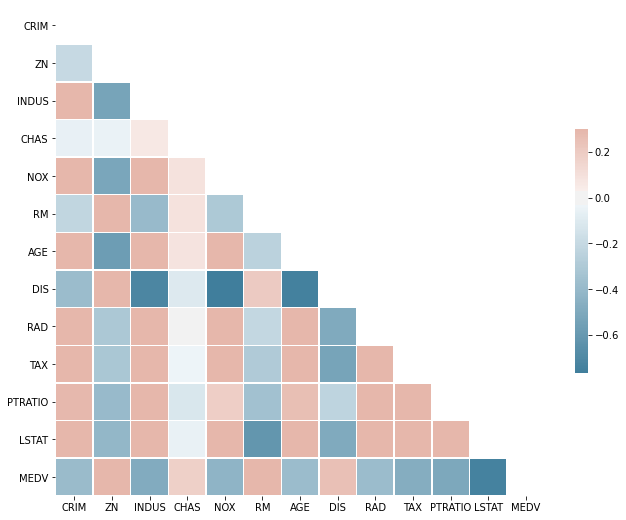

In [35]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

O coeficiente de correlação entre as variáveis varia de -1 a 1. Se o valor for próximo de 1, significa que há uma forte correlação positiva entre as duas variáveis. Quando está próximo de -1, as variáveis têm uma forte correlação negativa. Interprete o gráfico!

Devemos ficar atentos aquelas variáveis que possuem forte correlação com o variável alvo, pois elas podem ter peso significativo na performace do nosso modelo. Em Aprendizado de Máquina, esta seleção/exclusão de variáveis preditoras se chamada *Feature Selection*. Neste passo, o cientista de dados pode escolher remover ou combinar variáveis afim de melhorar (tunning) seu modelo. Não iremos realizar esta etapa por questão de tempo, mas você mesmo pode fazê-la ao término das tarefas.

Vamos analisar melhor a relação das variáveis LSTAT e RM com MEDV?

#### __TAREFA 09__
1. Plote um gráfico de dispersão de LSTAT e RM com MEDV.
2. Utilize subplots, matplotlib e seaborn

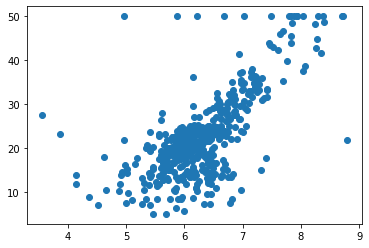

In [63]:
plt.scatter(df2.RM, df2.MEDV)

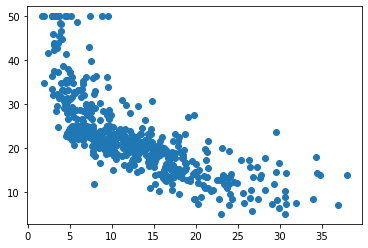

In [64]:
plt.scatter(df2.LSTAT, df2.MEDV)

Confirmando:
- Os preços aumentam à medida que o valor de RM aumenta linearmente. Existem poucos valores discrepantes e os dados parecem estar limitados a 50.
- Os preços tendem a diminuir com o aumento do LSTAT. Embora não pareça seguir exatamente uma linha linear.

Prosseguindo, vamos analisar a distribuição da variável alvo MEDV.

#### __TAREFA 10__
1. Plote a distribuição da variável alvo.
2. Use o *seaborn.distplot()*.

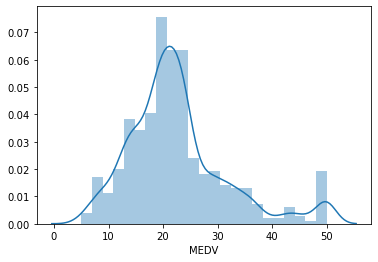

In [65]:
sns.distplot(df2.MEDV)


Podemos verificar que a variável alvo possui um distribuição próxima a uma normal. Contudo, podemos notar a presenção de alguns outliers em torno de 50. 

É tarefa essencial verificar a distribuição não só da variável alvo, como de todo o conjunto. Vamos discrepantes (outliers) podem confundir nosso modelo diminuindo a performance. Esta também é uma tarefa que pode consumir bastante tempo e você é encorajado à fazê-la.

### 2.4 Aplicar um modelo

Após realizar uma investigação superficial*, vamos prosseguir separando nossos dados de treino e teste. Logo após, vamos treinar nosso modelo.

\*Repare que chamamos a etapa anterior de **Análise Exploratória de Dados**, mas a verdade é que nem chegamos perto compreender totalmente o conjunto de dados. O que é normal, pois estamos querendo em entender o processo e não em exaurir o assunto.

#### __TAREFA 11__
1. Separe os dados em treino e teste.
2. Utilize 80% do dados para treino.

**DICA**: Use a função *train_test_split()* do scikit-learn

In [72]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [68]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

Ótimo! Carregamos nossos dados, verificamos se era necessário alguma limpeza, fizemos uma investigação superficial (AED) e separamos dados de treino e teste.

**FINALMENTE** o grande momento de treinar um algoritmo de Aprendizado de Máquina. Neste caso, vamos utilizar a Regressão Linear. Não entrarei em detalhes, mas a regressão linear basicamente gera uma equação que irá descrever a relação estatística entre as variáveis preditoras e a variável alvo. A Regressão Linear encontrará a linha que melhor representa as variáveis de entrada (X) com a variável de saída (Y).

#### __TAREFA 12__
1. Use o algoritmo de Regressão Linear para treinar um modelo
2. Passe os dados de treino de X e Y para o modelo.

In [94]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

Sim, com algumas linhas de código você tem um modelo treinado no scikit-learn. Percebeu que gastamos mais tempo preparando e entendendo os dados do que treinando o modelo? Muito bom não é! É exatamente assim que o cientista de dados gasta a maior parte do seu tempo - preparando e entendendo os dados.

### 2.5. Interpretar os resultados
Vamos verificar a performance do nosso modelo.

#### __TAREFA 13__
1. Utilize os dados de treino para prever a variável alvo.
2. Como métrica de performance, utilize o score R^2 

In [95]:
r2_score(y_train, y_pred)

0.7527072511027671

#### __TAREFA 14__
1. Utilize os dados de teste para prever a variável alvo.
2. Como métrica de performance, utilize o score R^2

In [97]:
regr.fit(X_test, y_test)
y_pred2 = regr.predict(X_test)
r2_score(y_test, y_pred2)

0.7006101014696382

## 3. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.